---
## Step 0: Load The Data

In [38]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']




# print("X_train.shape", X_train.shape)
# print("X_valid.shape", X_valid.shape)
# print("y_train.shape", y_train.shape)
# print("y_valid.shape", y_valid.shape)

print("x_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
x_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [39]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import random
import pandas as pd

# TODO: Number of training examples
n_train = len(X_train)

n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1],X_train.shape[2],X_train.shape[3]]

# TODO: How many unique classes/labels there are in the dataset.
def getLabelsCount(labels):
    d = dict(zip(labels, [0] * len(labels)))
    for x in labels:
        d[x] += 1
    return d
signsDicts = getLabelsCount(y_train)
n_classes = len(signsDicts)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

0. Speed limit (20km/h) - Samples: 180


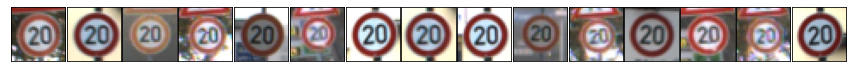

----------------------------------------------------------------------------

1. Speed limit (30km/h) - Samples: 1980


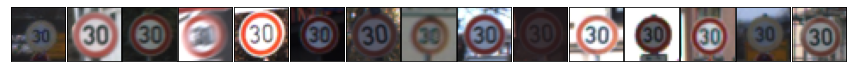

----------------------------------------------------------------------------

2. Speed limit (50km/h) - Samples: 2010


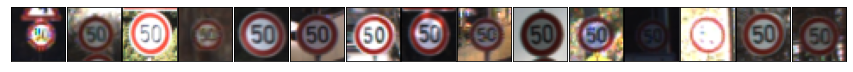

----------------------------------------------------------------------------

3. Speed limit (60km/h) - Samples: 1260


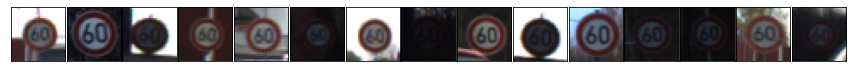

----------------------------------------------------------------------------

4. Speed limit (70km/h) - Samples: 1770


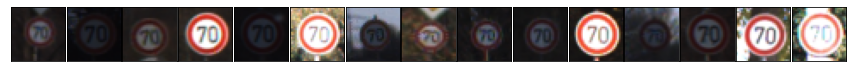

----------------------------------------------------------------------------

5. Speed limit (80km/h) - Samples: 1650


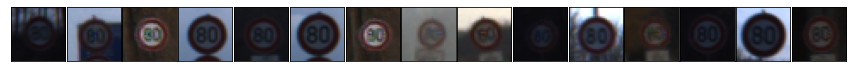

----------------------------------------------------------------------------

6. End of speed limit (80km/h) - Samples: 360


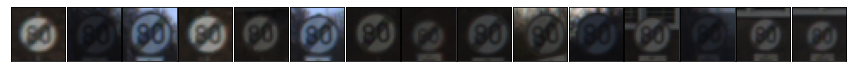

----------------------------------------------------------------------------

7. Speed limit (100km/h) - Samples: 1290


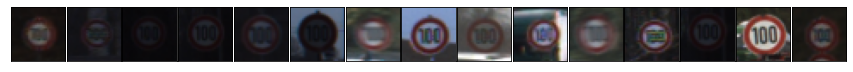

----------------------------------------------------------------------------

8. Speed limit (120km/h) - Samples: 1260


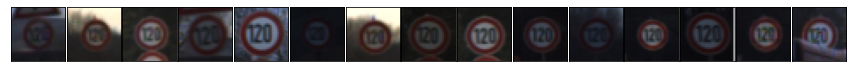

----------------------------------------------------------------------------

9. No passing - Samples: 1320


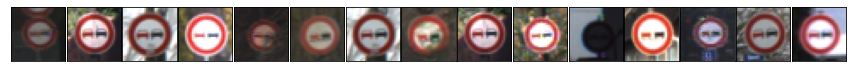

----------------------------------------------------------------------------

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


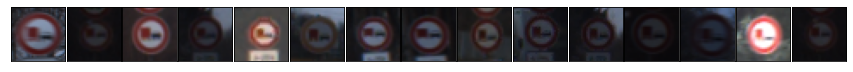

----------------------------------------------------------------------------

11. Right-of-way at the next intersection - Samples: 1170


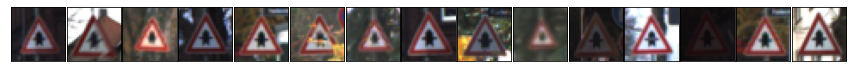

----------------------------------------------------------------------------

12. Priority road - Samples: 1890


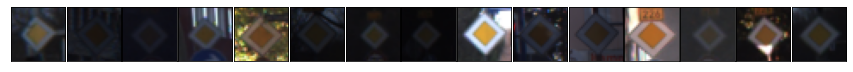

----------------------------------------------------------------------------

13. Yield - Samples: 1920


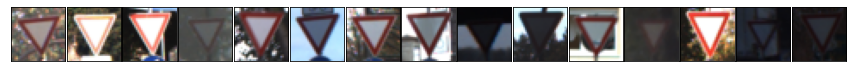

----------------------------------------------------------------------------

14. Stop - Samples: 690


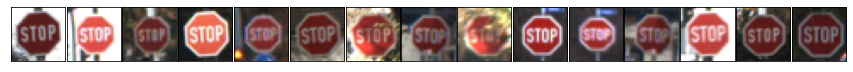

----------------------------------------------------------------------------

15. No vehicles - Samples: 540


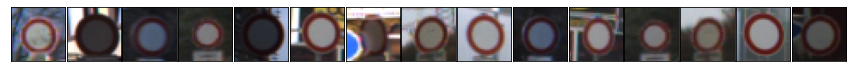

----------------------------------------------------------------------------

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


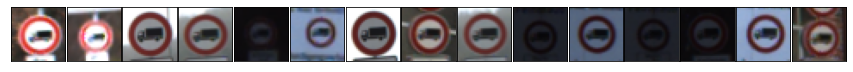

----------------------------------------------------------------------------

17. No entry - Samples: 990


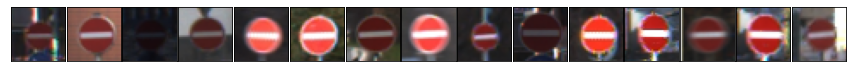

----------------------------------------------------------------------------

18. General caution - Samples: 1080


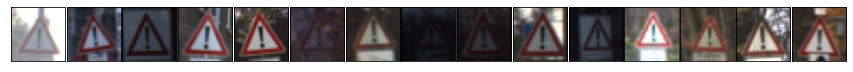

----------------------------------------------------------------------------

19. Dangerous curve to the left - Samples: 180


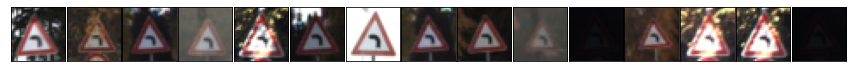

----------------------------------------------------------------------------

20. Dangerous curve to the right - Samples: 300


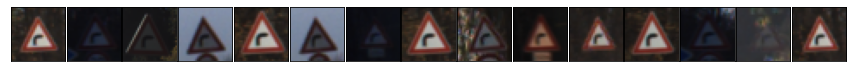

----------------------------------------------------------------------------

21. Double curve - Samples: 270


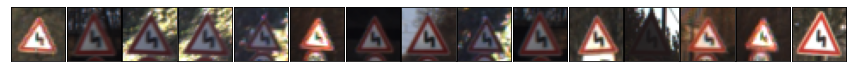

----------------------------------------------------------------------------

22. Bumpy road - Samples: 330


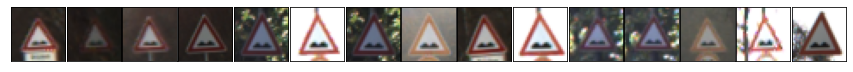

----------------------------------------------------------------------------

23. Slippery road - Samples: 450


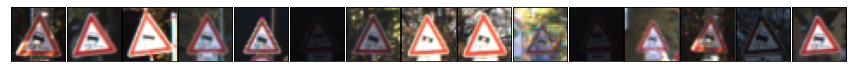

----------------------------------------------------------------------------

24. Road narrows on the right - Samples: 240


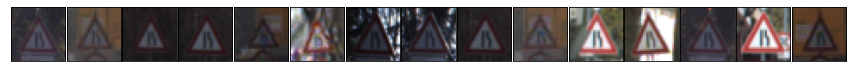

----------------------------------------------------------------------------

25. Road work - Samples: 1350


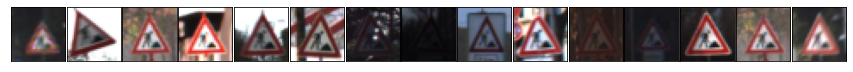

----------------------------------------------------------------------------

26. Traffic signals - Samples: 540


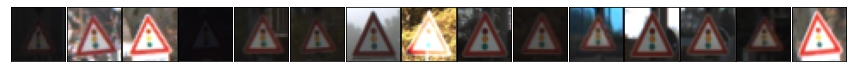

----------------------------------------------------------------------------

27. Pedestrians - Samples: 210


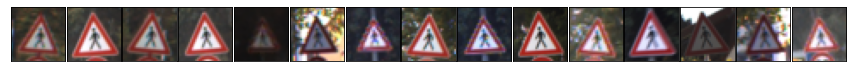

----------------------------------------------------------------------------

28. Children crossing - Samples: 480


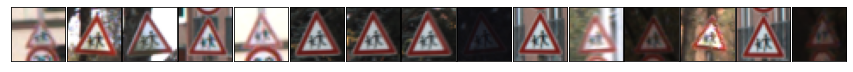

----------------------------------------------------------------------------

29. Bicycles crossing - Samples: 240


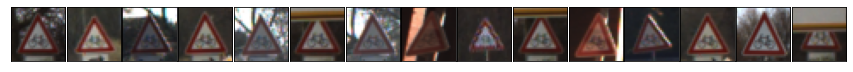

----------------------------------------------------------------------------

30. Beware of ice/snow - Samples: 390


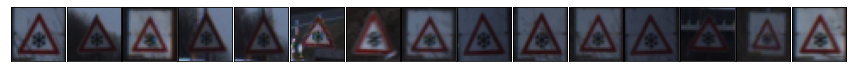

----------------------------------------------------------------------------

31. Wild animals crossing - Samples: 690


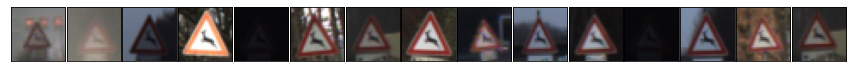

----------------------------------------------------------------------------

32. End of all speed and passing limits - Samples: 210


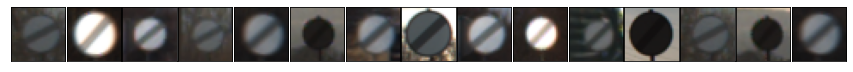

----------------------------------------------------------------------------

33. Turn right ahead - Samples: 599


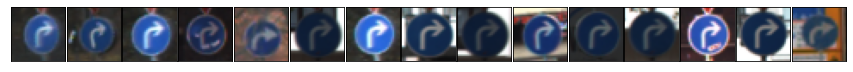

----------------------------------------------------------------------------

34. Turn left ahead - Samples: 360


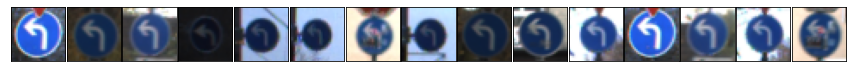

----------------------------------------------------------------------------

35. Ahead only - Samples: 1080


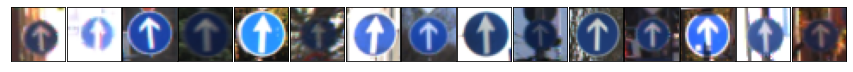

----------------------------------------------------------------------------

36. Go straight or right - Samples: 330


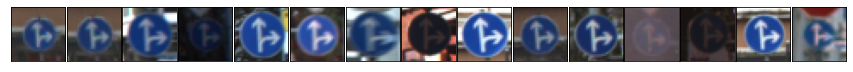

----------------------------------------------------------------------------

37. Go straight or left - Samples: 180


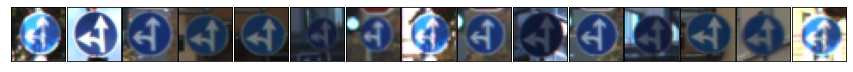

----------------------------------------------------------------------------

38. Keep right - Samples: 1860


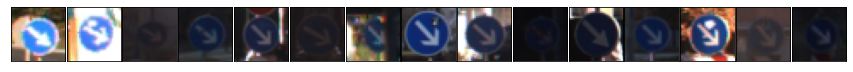

----------------------------------------------------------------------------

39. Keep left - Samples: 270


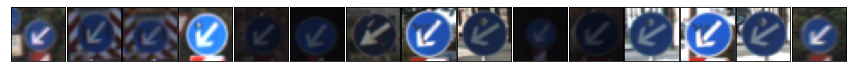

----------------------------------------------------------------------------

40. Roundabout mandatory - Samples: 300


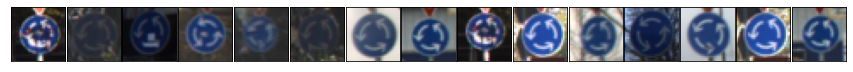

----------------------------------------------------------------------------

41. End of no passing - Samples: 210


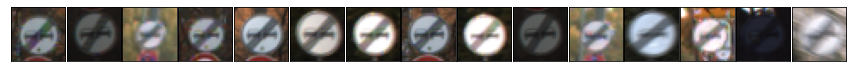

----------------------------------------------------------------------------

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


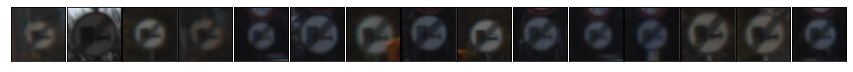

----------------------------------------------------------------------------



In [40]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

def getSignNames():
    return pd.read_csv('./signnames.csv').values

def plotImages(X, y, examples_per_sign=15, squeeze=False, cmap=None):
    samples_per_sign = np.bincount(y)
    for sign in getSignNames():
        print("{0}. {1} - Samples: {2}".format(sign[0], sign[1], samples_per_sign[sign[0]]))
        sample_indices = np.where(y==sign[0])[0]
        random_samples = random.sample(list(sample_indices), examples_per_sign)
        fig = plt.figure(figsize = (examples_per_sign, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for i in range(examples_per_sign):
            image = X[random_samples[i]]
            axis = fig.add_subplot(1,examples_per_sign, i+1, xticks=[], yticks=[])
            if squeeze: image = image.squeeze()
            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()
        print("----------------------------------------------------------------------------\n")

plotImages(X_train, y_train)

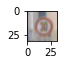

1


In [41]:
index = random.randint(3, len(X_train))
X_train_cnt=len(X_train)
image = X_train[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
plt.tight_layout()
plt.show()
print(y_train[index])   

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [42]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [43]:
grayconversion_train = tf.image.rgb_to_grayscale(X_train)
with tf.Session() as sess:
    grayscale_train = sess.run(grayconversion_train)
grayconversion_valid = tf.image.rgb_to_grayscale(X_valid)
with tf.Session() as sess:
    grayscale_valid = sess.run(grayconversion_valid)
grayconversion_test = tf.image.rgb_to_grayscale(X_test)
with tf.Session() as sess:
    grayscale_test = sess.run(grayconversion_test)

X_train_all = np.append(X_train,grayscale_train,axis=3)
X_test_all = np.append(X_test,grayscale_test,axis=3)
X_valid_all = np.append(X_valid,grayscale_valid,axis=3)
print(X_train_all.shape)
print(X_valid_all.shape)
print(X_test_all.shape)

(34799, 32, 32, 4)
(4410, 32, 32, 4)
(12630, 32, 32, 4)


### Model Architecture

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_5 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

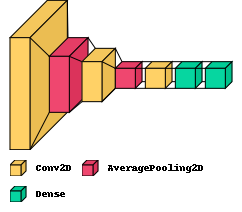

In [44]:
# Define your architecture here.
# Feel free to use as many code cells as needed.

import keras
from tensorflow import keras
import keras.layers as layers
import tensorflow as tf

total_classes = 43
height = 32
width = 32
channels = 3

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=(5,5), strides=1, activation='tanh', input_shape=(height,width,channels)),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=1, activation='tanh'),
    keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=120, kernel_size=(5, 5), activation='tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=84, activation='tanh'),
    keras.layers.Dense(units=43, activation='softmax'),
])
model.summary()

! pip install visualkeras
import visualkeras
visualkeras.layered_view(model, type_ignore=[layers.Flatten], legend=True)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [45]:
# Train your model here.
# Calculate and report the accuracy on the training and validation set.
# Once a final model architecture is selected, 
# the accuracy on the test set should be calculated and reported as well.
# Feel free to use as many code cells as needed.
# Compilation of the model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
epochs = 12
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_valid, y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/12
34799/34799 [==============================] - 8s 220us/sample - loss: 0.0408 - acc: 0.9870 - val_loss: 0.2513 - val_acc: 0.9342
Epoch 2/12
34799/34799 [==============================] - 7s 213us/sample - loss: 0.0152 - acc: 0.9959 - val_loss: 0.2796 - val_acc: 0.9245
Epoch 3/12
34799/34799 [==============================] - 8s 216us/sample - loss: 0.0319 - acc: 0.9904 - val_loss: 0.2732 - val_acc: 0.9361
Epoch 4/12
34799/34799 [==============================] - 8s 216us/sample - loss: 0.0264 - acc: 0.9913 - val_loss: 0.2604 - val_acc: 0.9379
Epoch 5/12
34799/34799 [==============================] - 7s 214us/sample - loss: 0.0251 - acc: 0.9925 - val_loss: 0.2554 - val_acc: 0.9338
Epoch 6/12
34799/34799 [==============================] - 8s 217us/sample - loss: 0.0258 - acc: 0.9922 - val_loss: 0.2584 - val_acc: 0.9365
Epoch 7/12
34799/34799 [==============================] - 7s 214us/sample - loss: 0.0396 - acc: 0.9878 - val_lo

In [50]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import time
from PIL import Image
from sklearn.metrics import accuracy_score

start = time.time()

# pred = model.predict_classes(X_test)
pred = np.argmax(model.predict(X_test), axis=1)

#Accuracy with the test data
print("模型準確度：" + str(accuracy_score(y_test, pred)))
end = time.time()
print("模型測試時間總共花了：", round(end-start,5), "seconds")

模型準確度：0.9121140142517815
模型測試時間總共花了： 0.853 seconds


### Load and Output the Images

testImages/1.png


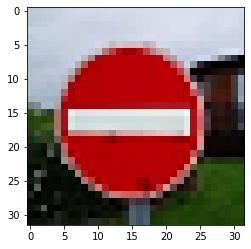

ClassId           17
SignName    No entry
Name: 17, dtype: object
testImages/2.png


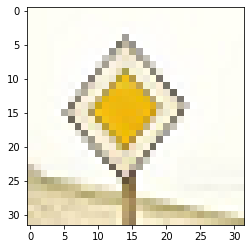

ClassId                12
SignName    Priority road
Name: 12, dtype: object
testImages/3.png


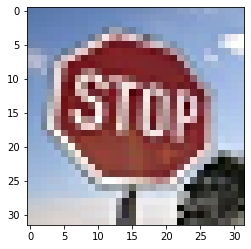

ClassId       14
SignName    Stop
Name: 14, dtype: object
testImages/4.png


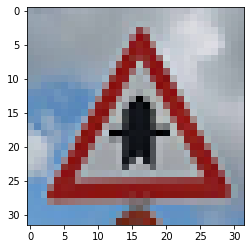

ClassId                                        11
SignName    Right-of-way at the next intersection
Name: 11, dtype: object
testImages/5.png


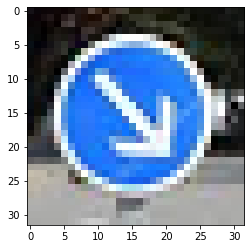

ClassId             38
SignName    Keep right
Name: 38, dtype: object
testImages/6.png


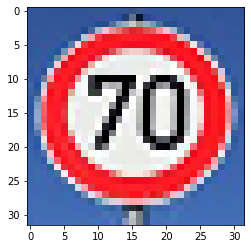

ClassId                              19
SignName    Dangerous curve to the left
Name: 19, dtype: object
testImages/7.png


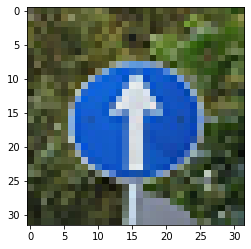

ClassId             35
SignName    Ahead only
Name: 35, dtype: object
testImages/8.png


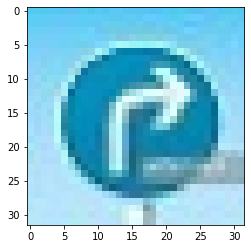

ClassId                   33
SignName    Turn right ahead
Name: 33, dtype: object
testImages/9.png


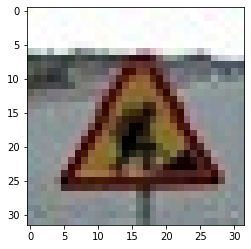

ClassId                                        11
SignName    Right-of-way at the next intersection
Name: 11, dtype: object
testImages/10.png


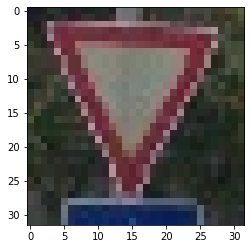

ClassId        13
SignName    Yield
Name: 13, dtype: object
(10, 32, 32, 3) (10,)
It has taken 1.14299 seconds


In [51]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
### dictionary to label all traffic signs class.

import time
import cv2
import matplotlib.pyplot as plt
import numpy as np

start = time.time()
image_data = []
image_labels = []
height = 32
width = 32
channels = 3
bond = pd.read_csv('./signnames.csv')

for i in range(1,11):
    print("testImages/" + str(i) + ".png")
    image = cv2.imread("testImages/" + str(i) + ".png")
    b,g,r = cv2.split(image)
    image = cv2.merge([r,g,b])

    plt.imshow(image)
    plt.show()

    img = image.reshape(1,height,width,3)
    pred = np.argmax(model.predict(img), axis=1)
    pred = int(pred)
    predict = bond.loc[pred]
    print(predict)

    image_data.append(np.array(image))
    image_labels.append(i)

#Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)
end = time.time()
print("It has taken", round(end-start,5), "seconds")
